<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Параметр-class_weight-для-борьбы-с-дисбалансом" data-toc-modified-id="Параметр-class_weight-для-борьбы-с-дисбалансом-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Параметр class_weight для борьбы с дисбалансом</a></span></li><li><span><a href="#Увеличение-выборки-для-борьбы-с-дисбалансом" data-toc-modified-id="Увеличение-выборки-для-борьбы-с-дисбалансом-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки для борьбы с дисбалансом</a></span></li><li><span><a href="#Уменьшение-выборки-для-борьбы-с-дисбалансом" data-toc-modified-id="Уменьшение-выборки-для-борьбы-с-дисбалансом-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки для борьбы с дисбалансом</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.inspection import permutation_importance

ModuleNotFoundError: No module named 'sklearn'

In [2]:
# отключить некритические предупреждения в коде
warnings.filterwarnings("ignore")

In [3]:
# убрать экспонентациальные формы при выводе данных
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
# сбросим ограничение на количество выводимых столбцов, что бы просмотреть все столбцы
pd.set_option('display.max_columns', None)

In [5]:
# чтение файла с данными и сохранение в DataFrame
df = pd.read_csv('/datasets/Churn.csv',index_col=0)

In [6]:
# получение первых 5 строк таблицы df
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


Согласно документации к данным:

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.

Описание данных:

-RowNumber — индекс строки в данных

-CustomerId — уникальный идентификатор клиента

-Surname — фамилия

-CreditScore — кредитный рейтинг

-Geography — страна проживания

-Gender — пол

-Age — возраст

-Tenure — сколько лет человек является клиентом банка

-Balance — баланс на счёте

-NumOfProducts — количество продуктов банка, используемых клиентом

-HasCrCard — наличие кредитной карты

-IsActiveMember — активность клиента

-EstimatedSalary — предполагаемая зарплата

Целевой признак Exited — факт ухода клиента

## Исследование задачи

In [8]:
# Посмотрим значения по столбцу Geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
# Посмотрим значения по столбцу Gender
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
# удалим колонки CustomerId,Surname. Предполагаем , что id и фамилия клиента совершенно не влияют на факт ухода клиента
df.drop(columns=['CustomerId','Surname'],axis=1,inplace=True)

In [11]:
# Применим one hot encoding к датафрейму, избежав "ловушку фиктивных признаков"
df_ohe=pd.get_dummies(df, drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2.00,0.00,1,1,1,"101,348.88",1,0,0,0
2,608,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,1,0
3,502,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0,0
4,699,39,1.00,0.00,2,0,0,"93,826.63",0,0,0,0
5,850,43,2.00,"125,510.82",1,1,1,"79,084.10",0,0,1,0


In [12]:
# посмотрим статистики по столбцу Tenure
df_ohe['Tenure'].describe()

count   9,091.00
mean        5.00
std         2.89
min         0.00
25%         2.00
50%         5.00
75%         7.00
max        10.00
Name: Tenure, dtype: float64

In [13]:
# посмотрим значения по столбцу Tenure
df_ohe['Tenure'].value_counts()

1.00     952
2.00     950
8.00     933
3.00     928
5.00     927
7.00     925
4.00     885
9.00     882
6.00     881
10.00    446
0.00     382
Name: Tenure, dtype: int64

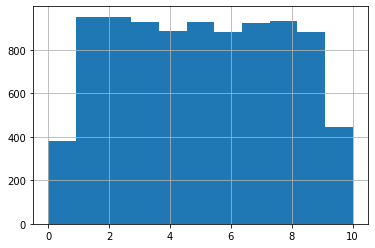

In [14]:
# построим гистограмму по столбцу Tenure
df_ohe['Tenure'].hist(bins=11)
plt.show()


Количество пропусков в Tenure чуть меньше 10 %, с другой стороны к запонению пропусков  нужно подойти ответственно, рандомные числа дадут искаженную инфо, как и заполнение нулями, я принимаю решение их удалить.

In [15]:
#df_ohe['Tenure'].fillna(0,inplace=True) #при построении гистограммы заполнение 
#нулем не подошло, закоментировала этот код
#data = (np.random.randint(0,10,size=df_ohe['Tenure'].isna().sum()))
#df_ohe.loc[df_ohe['Tenure'].isna(),'Tenure']=data
#df_ohe['Tenure'].fillna(df_ohe['Tenure'].median(), inplace=True)
df_ohe.dropna(subset=['Tenure'], axis=0,inplace=True) 


In [16]:
df_ohe['Tenure'].describe()

count   9,091.00
mean        5.00
std         2.89
min         0.00
25%         2.00
50%         5.00
75%         7.00
max        10.00
Name: Tenure, dtype: float64

In [17]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


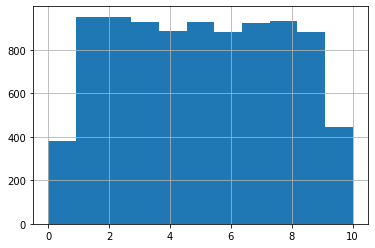

In [18]:
# Посмотрим повторно гистограмму по столбцу Tenure
df_ohe['Tenure'].hist(bins=11)
plt.show()

In [19]:
# Проверим, что в датафрейме отсутствуют пропущенные значения
df_ohe.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [20]:
# Создадим список с числовыми столбцами
numeric = ['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Tenure']

In [21]:
# посмотрим корреляцию факторов
df_ohe.loc[:,numeric].corr().style.applymap(lambda x: f"color: {'red' if (abs(x) > 0.5  and x !=1)else 'black'}")
    

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Tenure
CreditScore,1.000000,-0.004504,0.002804,0.011090,0.005182,-0.000062
Age,-0.004504,1.000000,0.031481,-0.031877,-0.007037,-0.013134
Balance,0.002804,0.031481,1.000000,-0.301858,0.014351,-0.007911
NumOfProducts,0.011090,-0.031877,-0.301858,1.000000,0.013990,0.011979
EstimatedSalary,0.005182,-0.007037,0.014351,0.013990,1.000000,0.010520
Tenure,-0.000062,-0.013134,-0.007911,0.011979,0.010520,1.000000


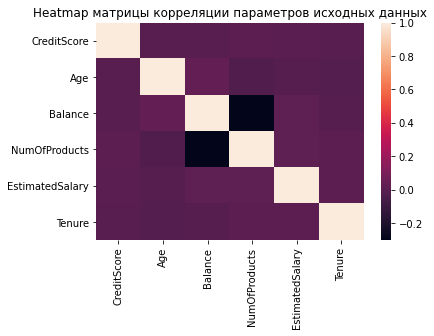

In [22]:
# для наглядности построим heatmap матрицы корреляции
sns.heatmap(df_ohe.loc[:,numeric].corr(),
            xticklabels=df_ohe.loc[:,numeric].corr().columns,
            yticklabels=df_ohe.loc[:,numeric].corr().columns)
plt.title('Heatmap матрицы корреляции параметров исходных данных')
plt.show()

Корреляции между числовыми столбцами не обнаружено, самое больше значение 0,3 это корреляция между Количеством продуктов и балансом на счете. Проверим наличие ложной корреляции, посмотрим скатерплоты

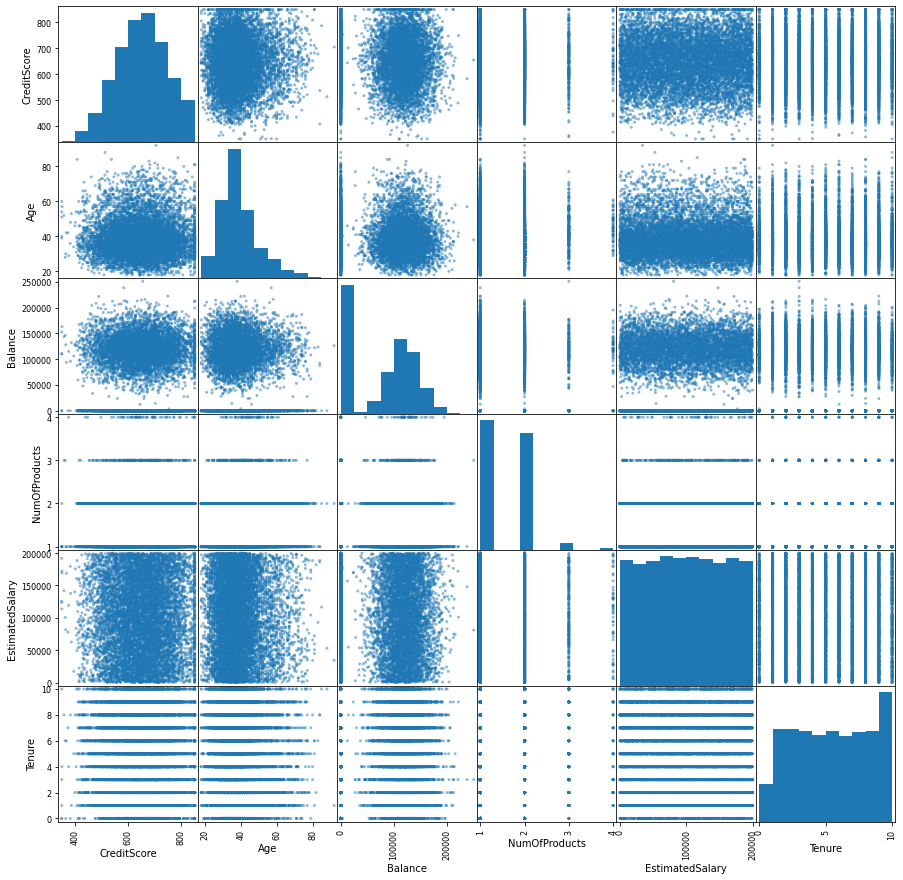

In [23]:
pd.plotting.scatter_matrix(df_ohe.loc[:,numeric],figsize=(15,15))
plt.show()

По графикам так же не обнаружено ложной корреляции между столбцами, все числовые столбцы оставляем в датафрейме для обучения модели.

In [24]:
# Проверим наличие аномальных значений по числовым столбцам
df_ohe[numeric].describe()

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Tenure
count,"9,091.00","9,091.00","9,091.00","9,091.00","9,091.00","9,091.00"
mean,650.74,38.95,"76,522.74",1.53,"100,181.21",5.00
std,96.41,10.56,"62,329.53",0.58,"57,624.76",2.89
min,350.00,18.00,0.00,1.00,11.58,0.00
25%,584.00,32.00,0.00,1.00,"51,227.74",2.00
50%,652.00,37.00,"97,318.25",1.00,"100,240.20",5.00
75%,717.00,44.00,"127,561.89",2.00,"149,567.21",7.00
max,850.00,92.00,"250,898.09",4.00,"199,992.48",10.00


In [25]:
# Выделем целевой столбец из датафрейма
target = df_ohe['Exited']

In [26]:
# Выделем датафрейм признаков  
features = df_ohe.drop('Exited', axis=1)

In [27]:
# разделим все данные на тестовую и обучающую выборку. В связи с применением GridSearchCV 
# выделять валидационную выборку отдельно нет необходимости
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [28]:
# Нормируем числовые данные, используя StandardScaler
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_test.shape)

(6818, 11)
(2273, 11)


In [29]:
# Посмотрим количество объектов отрицательного и положительно класса
features[target == 0].shape, features[target == 1].shape

((7237, 11), (1854, 11))

Наблюдается дисбаланс классов, объектов отрицательного класса почти в 4 раза больше , чем объектов положительного. Рассчитаем базовые модели на несбалансированных данных.

In [30]:
# Обучим базовую модель логистической регрессии и посчитаем метрики на тестовой выборке
model_base_lgr = LogisticRegression(random_state=12345, solver='liblinear')
model_base_lgr.fit(features_train, target_train)
predicted_test = model_base_lgr.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.3089700996677741
ROC_auc: 0.5871876376682138


In [1]:
# Подберем оптимальные параметры для модели случайного леса
parameters = {
    'n_estimators' : [5,25,50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth':[5,10,20,25]
}

rfc = RandomForestClassifier(random_state=12345)

clf_rfc = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)

clf_rfc.fit(features_train, target_train)

NameError: name 'RandomForestClassifier' is not defined

In [32]:
# Обучим модель случайного леса с лучшими гиперпараметрами и рассчитаем метрики на тестовой выборке
model_base_rfc = clf_rfc.best_estimator_.fit(features_train, target_train)
predicted_test = model_base_rfc.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5714285714285715
ROC_auc: 0.714198962666206


In [33]:
# Подберем оптимальные параметры для модели Градиентного бустинга
parameters = {
    'learning_rate' : [0.1, 0.01],
    'n_estimators' : [50, 100, 150],
    'max_depth':[3,5,10,20],
}

gbc = GradientBoostingClassifier(random_state=12345)

clf_gbc = GridSearchCV(
    estimator = gbc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)
    
clf_gbc.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=12345),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [34]:
# Обучим модель градиентного бустинга с лучшими гиперпараметрами и рассчитаем метрики на тестовой выборке
model_base_gbc = clf_gbc.best_estimator_.fit(features_train, target_train)
predicted_test = model_base_gbc.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5839017735334243
ROC_auc: 0.718589742029543


In [35]:
# Рассчитаем оптимальный порог классификации для логистической регрессии 
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test) 
    recall = recall_score(target_test,predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test)))

Порог = 0.00 | Точность = 0.198, Полнота = 1.000, F1 = 0.331, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.199, Полнота = 0.998, F1 = 0.332, ROC_auc = 0.502
Порог = 0.04 | Точность = 0.208, Полнота = 0.993, F1 = 0.344, ROC_auc = 0.529
Порог = 0.06 | Точность = 0.227, Полнота = 0.967, F1 = 0.367, ROC_auc = 0.575
Порог = 0.08 | Точность = 0.248, Полнота = 0.947, F1 = 0.392, ROC_auc = 0.617
Порог = 0.10 | Точность = 0.270, Полнота = 0.925, F1 = 0.417, ROC_auc = 0.652
Порог = 0.12 | Точность = 0.293, Полнота = 0.907, F1 = 0.443, ROC_auc = 0.683
Порог = 0.14 | Точность = 0.315, Полнота = 0.874, F1 = 0.464, ROC_auc = 0.702
Порог = 0.16 | Точность = 0.343, Полнота = 0.834, F1 = 0.486, ROC_auc = 0.720
Порог = 0.18 | Точность = 0.365, Полнота = 0.789, F1 = 0.499, ROC_auc = 0.725
Порог = 0.20 | Точность = 0.382, Полнота = 0.734, F1 = 0.502, ROC_auc = 0.720
Порог = 0.22 | Точность = 0.405, Полнота = 0.694, F1 = 0.511, ROC_auc = 0.721
Порог = 0.24 | Точность = 0.421, Полнота = 0.643, F1 = 0.509, RO

In [36]:
# Рассчитаем оптимальный порог классификации для градиентного бустинга 

probabilities_test = model_base_gbc.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test) 
    recall = recall_score(target_test,predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test)))

Порог = 0.00 | Точность = 0.198, Полнота = 1.000, F1 = 0.331, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.207, Полнота = 1.000, F1 = 0.343, ROC_auc = 0.526
Порог = 0.04 | Точность = 0.244, Полнота = 0.987, F1 = 0.391, ROC_auc = 0.614
Порог = 0.06 | Точность = 0.275, Полнота = 0.969, F1 = 0.428, ROC_auc = 0.668
Порог = 0.08 | Точность = 0.310, Полнота = 0.936, F1 = 0.465, ROC_auc = 0.710
Порог = 0.10 | Точность = 0.344, Полнота = 0.916, F1 = 0.500, ROC_auc = 0.741
Порог = 0.12 | Точность = 0.380, Полнота = 0.885, F1 = 0.531, ROC_auc = 0.763
Порог = 0.14 | Точность = 0.408, Полнота = 0.856, F1 = 0.553, ROC_auc = 0.775
Порог = 0.16 | Точность = 0.444, Полнота = 0.838, F1 = 0.581, ROC_auc = 0.789
Порог = 0.18 | Точность = 0.478, Полнота = 0.805, F1 = 0.600, ROC_auc = 0.794
Порог = 0.20 | Точность = 0.495, Полнота = 0.765, F1 = 0.601, ROC_auc = 0.786
Порог = 0.22 | Точность = 0.516, Полнота = 0.732, F1 = 0.605, ROC_auc = 0.781
Порог = 0.24 | Точность = 0.534, Полнота = 0.710, F1 = 0.610, RO

Вывод
Базовая модель логистической регрессии на тестовых данных показала результат по f1 и roc_auc соответственно 0,29 и 0,58.
Модель случайного леса на тестовых данных f1 и roc_auc соответственно 0,58 и 0,71.
Модель градиентного бустинга на тестовых данных f1 и roc_auc соответственно 0,60 и 0,72.
При изменении порога классификации в логистической регрессии оптимальные значений метрик составляют F1 = 0.506, ROC_auc = 0.701 при пороге =0,22.
При изменении порога классификации градиентный бустинг на тестовых данных при пороге 0,2 дает результат 0,625 и 0,785. Таким образом, лучший результат на текущих обучающих данных без борьбы с дисбалансом классов получены градиентным бустингом.

## Борьба с дисбалансом

Посмотрим балланс классов в датафрейме

In [37]:
# Посмотрим количество объектов отрицательного класса
features_zeros = features[target == 0]
features_zeros.shape

(7237, 11)

In [38]:
# Посмотрим количество объектов положительного класса
features_ones = features[target == 1]
features_ones.shape

(1854, 11)

Объектов отрицательно класса почти в четыре раза больше, чем объектов положительного класса. Изучим разные методы борьбы с дисбалансом классов и выберем оптимальную модель и оптимальный метод корректировки дисбаланса классов.

### Параметр class_weight для борьбы с дисбалансом

In [39]:
# Рассчитаем модель логистической регрессии с параметром class_weight = 'balanced'
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5113369820172009
ROC_auc: 0.7250414373717632


In [40]:
# Рассчитаем оптимальный порог классификации для логистической регрессии с параметром class_weight = 'balanced'

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.8, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test) 
    recall = recall_score(target_test,predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test)))

Порог = 0.00 | Точность = 0.198, Полнота = 1.000, F1 = 0.331, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.198, Полнота = 1.000, F1 = 0.331, ROC_auc = 0.500
Порог = 0.04 | Точность = 0.198, Полнота = 1.000, F1 = 0.331, ROC_auc = 0.500
Порог = 0.06 | Точность = 0.198, Полнота = 0.998, F1 = 0.331, ROC_auc = 0.500
Порог = 0.08 | Точность = 0.200, Полнота = 0.998, F1 = 0.333, ROC_auc = 0.504
Порог = 0.10 | Точность = 0.202, Полнота = 0.998, F1 = 0.336, ROC_auc = 0.510
Порог = 0.12 | Точность = 0.205, Полнота = 0.993, F1 = 0.339, ROC_auc = 0.519
Порог = 0.14 | Точность = 0.209, Полнота = 0.993, F1 = 0.345, ROC_auc = 0.532
Порог = 0.16 | Точность = 0.216, Полнота = 0.989, F1 = 0.354, ROC_auc = 0.550
Порог = 0.18 | Точность = 0.221, Полнота = 0.976, F1 = 0.361, ROC_auc = 0.563
Порог = 0.20 | Точность = 0.228, Полнота = 0.965, F1 = 0.369, ROC_auc = 0.579
Порог = 0.22 | Точность = 0.235, Полнота = 0.958, F1 = 0.377, ROC_auc = 0.593
Порог = 0.24 | Точность = 0.244, Полнота = 0.951, F1 = 0.388, RO

In [41]:
# Подберем оптимальные параметры для модели Случайного леса с параметром class_weight = 'balanced'
parameters = {
    'n_estimators' : [25,50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth':[5,10,20],    
    'class_weight' : ['balanced']
}

rfc = RandomForestClassifier(random_state=12345)

clf_rfc_b = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)

clf_rfc_b.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1')

In [42]:
# Обучим модель Случайного леса с лучшими гиперпараметрами и с параметром class_weight = 'balanced'. 
# Рассчитаем метрики на тестовой выборке
model_rfc_b = clf_rfc_b.best_estimator_.fit(features_train, target_train)
predicted_test = model_rfc_b.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.6253934942287513
ROC_auc: 0.774394503250491


In [43]:
# Рассчитаем оптимальный порог классификации для случайного леса с параметром  class_weight = 'balanced'

probabilities_test = model_rfc_b.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.8, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test) 
    recall = recall_score(target_test,predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test)))

Порог = 0.00 | Точность = 0.198, Полнота = 1.000, F1 = 0.331, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.199, Полнота = 1.000, F1 = 0.331, ROC_auc = 0.501
Порог = 0.04 | Точность = 0.201, Полнота = 1.000, F1 = 0.334, ROC_auc = 0.507
Порог = 0.06 | Точность = 0.210, Полнота = 0.996, F1 = 0.347, ROC_auc = 0.535
Порог = 0.08 | Точность = 0.224, Полнота = 0.993, F1 = 0.366, ROC_auc = 0.571
Порог = 0.10 | Точность = 0.236, Полнота = 0.989, F1 = 0.381, ROC_auc = 0.598
Порог = 0.12 | Точность = 0.248, Полнота = 0.984, F1 = 0.396, ROC_auc = 0.622
Порог = 0.14 | Точность = 0.258, Полнота = 0.971, F1 = 0.407, ROC_auc = 0.640
Порог = 0.16 | Точность = 0.270, Полнота = 0.962, F1 = 0.421, ROC_auc = 0.658
Порог = 0.18 | Точность = 0.284, Полнота = 0.947, F1 = 0.438, ROC_auc = 0.679
Порог = 0.20 | Точность = 0.299, Полнота = 0.936, F1 = 0.454, ROC_auc = 0.697
Порог = 0.22 | Точность = 0.315, Полнота = 0.920, F1 = 0.469, ROC_auc = 0.712
Порог = 0.24 | Точность = 0.335, Полнота = 0.916, F1 = 0.491, RO

Вывод
При применении гиперпараметра class_weight = 'balanced' для борьбы с дисбалансом классов модель логистической регрессии показала результат на тестовой выборке по f1 0,51 и roc_auc 0,71, что значительно лучше, чем без данного гиперпараметра.
Модель случайного леса показала результат на тестовой выборке по f1 0,64 и roc_auc 0,79. Результат по метрикам случайного леса так же лучше результата без применения гиперпараметра class_weight = 'balanced'( в модели без данного гиперпараметра f1 и roc_auc соответственно 0,58 и 0,71) При изменении порога модель случайного леса показала лучший результат при пороге равном 0,42 f1 0,633 и roc_auc 0,793

### Увеличение выборки для борьбы с дисбалансом

In [44]:
# Создадим функцию,которая принимает на вход : датафрейм признаков, целевые значения, количество раз,
# в которое необходимо увеличить меньший класс, что бы выборка стала сбалансированной
# результат функции : увеличенная исходная выборка со сбалансированными классами: датафрейм признаков и целевые значения
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)    
    return features_upsampled, target_upsampled

In [45]:
# признаки и целевое значение увеличенной обучающей выборки 
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Далее обучим логистическую регрессию, градиентный бустинг и случайный лес на признаках увеличенной обучающей выборки, и рассчитаем метрики f1 и roc_auc

In [46]:
# Обучим модель логистической регрессии по увеличенной сбалансированной выборке и посчитаем метрики на тестовой выборке
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_upsampled,target_upsampled)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5080091533180778
ROC_auc: 0.7245583056070057


In [47]:
# Подберем оптимальные параметры для модели Случайного леса по увеличенной сбалансированной выборке
parameters = {
    'n_estimators' : [25,50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth':[5,10,20]    
}

rfc = RandomForestClassifier(random_state=12345)

clf_rfc_upsampled = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)

clf_rfc_upsampled.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1')

In [48]:
# Обучим модель Случайного леса с лучшими гиперпараметрами по увеличенной сбалансированной выборке. 
# Рассчитаем метрики на тестовой выборке
model_rfc_upsampled = clf_rfc_upsampled.best_estimator_.fit(features_upsampled, target_upsampled)
predicted_test = model_rfc_upsampled.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5954381752701081
ROC_auc: 0.7381717904595471


In [49]:
# Подберем оптимальные параметры для модели Градиентного бустинга по увеличенной сбалансированной выборке
parameters = {
    'learning_rate' : [0.1, 0.01],
    'n_estimators' : [50, 100, 150],
    'max_depth':[3,5,10,20],
}

gbc = GradientBoostingClassifier(random_state=12345)

clf_gbc_upsampled = GridSearchCV(
    estimator = gbc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)
    
clf_gbc_upsampled.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=12345),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [50]:
# Обучим модель Градиентного бустинга с лучшими гиперпараметрами по увеличенной сбалансированной выборке. 
# Рассчитаем метрики на тестовой выборке
model_gbc_upsampled = clf_gbc_upsampled.best_estimator_.fit(features_upsampled, target_upsampled)
predicted_test = model_gbc_upsampled.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5899632802937577
ROC_auc: 0.7328810717006482


Вывод

При увеличении выбоки для борьбы с дисбалансом классов метрики логистической регресси f1 и roc_auc составили соответственно 0,51 и 0,71 , данный результат полностью соответствует результату, полученному при применении гиперпараметра class_weight = 'balanced' для логистической регрессии.
При увеличении выбоки для борьбы с дисбалансом классов метрики случайного леса на тестовых данных f1 и roc_auc составили соответственно 0,61 и 0,74 , данный результат хуже результата, полученному при применении гиперпараметра class_weight = 'balanced' для случайного леса(0,64 и 0,79 соответственно).
Градиентный бустинг, обученный на увеличенной выборке, показал на тестовых данных результат по f1 и roc_auc соответственно 0,59 и 0,72, что соответствует результату по градиентному бустингу, обученному на первоначальном датафрейме ( с дисбалансом классов).

### Уменьшение выборки для борьбы с дисбалансом

In [51]:
# Создадим функцию,которая принимает на вход : датафрейм признаков, целевые значения, долю
# более многочисленного класса, что бы выборка стала сбалансированной
# результат функции : уменьшена исходная выборка со сбалансированными классами: датафрейм признаков и целевые значения
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)    
    return features_downsampled, target_downsampled

In [52]:
# признаки и целевое значение уменьшенной обучающей выборки
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Далее обучим логистическую регрессию, градиентный бустинг и случайный лес на признаках уменьшенной обучающей выборки, и рассчитаем метрики f1 и roc_auc

In [53]:
# Обучим модель логистической регрессии по увеличенной сбалансированной выборке и посчитаем метрики на тестовой выборке
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_downsampled,target_downsampled)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5110941086457537
ROC_auc: 0.7270390716081595


In [54]:
# Подберем оптимальные параметры для модели Случайного леса по уменьшенной сбалансированной выборке
parameters = {
    'n_estimators' : [25,50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth':[5,10,20],
}

rfc = RandomForestClassifier(random_state=12345)

clf_rfc_downsampled = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)

clf_rfc_downsampled.fit(features_downsampled,target_downsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1')

In [55]:
# Обучим модель Случайного леса с лучшими гиперпараметрами по уменьшенной сбалансированной выборке. 
# Рассчитаем метрики на тестовой выборке
model_rfc_downsampled = clf_rfc_downsampled.best_estimator_.fit(features_downsampled,target_downsampled)
predicted_test = model_rfc_downsampled.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5854879065888241
ROC_auc: 0.7801890420361144


In [56]:
# Подберем оптимальные параметры для модели Градиентного бустинга по уменьшенной сбалансированной выборке
parameters = {
    'learning_rate' : [0.1, 0.01],
    'n_estimators' : [50, 100, 150],
    'max_depth':[3,5,10,20],
}

gbc = GradientBoostingClassifier(random_state=12345)

clf_gbc_downsampled = GridSearchCV(
    estimator = gbc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)
    
clf_gbc_downsampled.fit(features_downsampled,target_downsampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=12345),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [57]:
# Обучим модель Градиентного бустинга с лучшими гиперпараметрами по уменьшенной сбалансированной выборке. 
# Рассчитаем метрики на тестовой выборке
model_gbc_downsampled = clf_gbc_downsampled.best_estimator_.fit(features_downsampled,target_downsampled)
predicted_test = model_gbc_downsampled.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5897219882055602
ROC_auc: 0.7820990553982976


Вывод

При уменьшении выбоки для борьбы с дисбалансом классов метрики логистической регресси f1 и roc_auc составили соответственно 0,51 и 0,71 , данный результат полностью соответствует результатам, полученным при применении гиперпараметра class_weight = 'balanced' и при применении метода увеличения обучающей выборки для логистической регрессии.
При уменьшении выбоки для борьбы с дисбалансом классов метрики случайного леса на тестовых данных f1 и roc_auc составили соответственно 0,62 и 0,79 , данный результат незначительно хуже по параметру f1 и лучше по параметру roc_auc, полученному при применении гиперпараметра class_weight = 'balanced' для случайного леса(0,64 и 0,78 соответственно).
Градиентный бустинг, обученный на уменьшенной выборке, показал на тестовых данных результат по f1 и roc_auc соответственно 0,62 и 0,79, что является лучшем результатом по градиентному бустингу.

## Тестирование модели

Создадим константную модель: любому объекту она прогнозирует класс «1».

In [58]:
target_pred_constant =[int(i) for i in '1'*df_ohe['Exited'].shape[0]]

In [59]:
print("precision:", precision_score(target, target_pred_constant))
print("recall:", recall_score(target, target_pred_constant))
print("F1:", f1_score(target, target_pred_constant))
print("ROC_auc:", roc_auc_score(target, target_pred_constant))
print("accuracy:", accuracy_score(target, target_pred_constant))

precision: 0.2039379606203938
recall: 1.0
F1: 0.3387848332571951
ROC_auc: 0.5
accuracy: 0.2039379606203938


Хорошая модель, полученная для данного датафрейма , это модель Градиентного бустинга, обученного на уменьшенной выборке. Очень хорошие результаты показало изменение порога для модели градиентного бустинга без учета дисбалансов классов: на тестовых данных при пороге 0,2 дает результат 0,625 и 0,785.
При изменении порога модель случайного леса с гиперпараметром class_weight = 'balanced'показала лучший результат на тесте при пороге равном 0,42 f1 0,633 и roc_auc 0,793.
Рассчитаем данные метрики на всех данных и на тестовых данных для этих моделей.

In [60]:
features[numeric] = scaler.transform(features[numeric])

In [61]:
# Соберем полученные данные по моделям и метрикам в таблицу
models = [model_gbc_downsampled, model_base_gbc, model_rfc_b]
models_name = ['GBC downsampled', 'GBC downsampled_test', 'GBC threshold 0.2', 'GBC threshold 0.2_test', 'RFC threshold 0.42', 'RFC threshold 0.42_test']
columns_name = ['precision', 'recall', 'f1', 'roc_auc', 'accuracy']
metrics_name=[precision_score, recall_score, f1_score, roc_auc_score, accuracy_score]
result=[]
for i in models:
  if i == model_base_gbc:
    threshold = 0.2
  elif i == model_rfc_b:
      threshold = 0.42
  else:
    threshold = 0.5
  res=[]
  res_test=[]
  for j in metrics_name:
    res.append(j(target, i.predict_proba(features)[:, 1] > threshold))
    res_test.append(j(target_test, i.predict_proba(features_test)[:, 1] > threshold))
  result.append(res)
  result.append(res_test)
df_result=pd.DataFrame(result,index=models_name,columns=columns_name)
df_result

,precision,recall,f1,roc_auc,accuracy
GBC downsampled,0.54,0.87,0.66,0.84,0.82
GBC downsampled_test,0.48,0.78,0.59,0.78,0.79
GBC threshold 0.2,0.53,0.78,0.63,0.80,0.81
GBC threshold 0.2_test,0.49,0.76,0.60,0.79,0.80
RFC threshold 0.42,0.60,0.87,0.71,0.86,0.85
RFC threshold 0.42_test,0.49,0.75,0.59,0.78,0.80


Бустинг стабильно работает на полном датасете и на тестовых данных метрики не сильно отличаются, для модели случайного леса метрики для тестовой выборки существенно ниже, чем метрики для датасета в целом.

Обе модели бустинга примерно одинаковые результаты на тесте показали. Попробуем проанализировать порог для бустинга на уменьшенной выборке.

In [62]:
# Рассчитаем оптимальный порог классификации для градиентного бустинга на уменьшенной выборке

probabilities_test = model_gbc_downsampled.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.8, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test) 
    recall = recall_score(target_test,predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test)))

Порог = 0.00 | Точность = 0.198, Полнота = 1.000, F1 = 0.331, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.199, Полнота = 1.000, F1 = 0.332, ROC_auc = 0.502
Порог = 0.04 | Точность = 0.207, Полнота = 0.996, F1 = 0.343, ROC_auc = 0.526
Порог = 0.06 | Точность = 0.219, Полнота = 0.991, F1 = 0.359, ROC_auc = 0.559
Порог = 0.08 | Точность = 0.229, Полнота = 0.980, F1 = 0.371, ROC_auc = 0.582
Порог = 0.10 | Точность = 0.241, Полнота = 0.978, F1 = 0.387, ROC_auc = 0.609
Порог = 0.12 | Точность = 0.252, Полнота = 0.969, F1 = 0.400, ROC_auc = 0.629
Порог = 0.14 | Точность = 0.267, Полнота = 0.962, F1 = 0.419, ROC_auc = 0.655
Порог = 0.16 | Точность = 0.280, Полнота = 0.951, F1 = 0.432, ROC_auc = 0.672
Порог = 0.18 | Точность = 0.289, Полнота = 0.942, F1 = 0.443, ROC_auc = 0.685
Порог = 0.20 | Точность = 0.299, Полнота = 0.929, F1 = 0.452, ROC_auc = 0.694
Порог = 0.22 | Точность = 0.310, Полнота = 0.925, F1 = 0.465, ROC_auc = 0.708
Порог = 0.24 | Точность = 0.321, Полнота = 0.916, F1 = 0.476, RO

In [63]:
models = [model_gbc_downsampled, model_gbc_downsampled, model_base_gbc]
models_name = ['GBC downsampled', 'GBC downsampled_test','GBC downsampled_0.62', 'GBC downsampled_test 0.62', 'GBC threshold 0.2', 'GBC threshold 0.2_test']
columns_name = ['precision', 'recall', 'f1', 'roc_auc', 'accuracy']
metrics_name=[precision_score, recall_score, f1_score, roc_auc_score, accuracy_score]
result=[]
for i in range(len(models)):
  if i == 0:
    threshold = 0.5
  elif i == 1:
      threshold = 0.62
  else:
    threshold = 0.2  
  res=[]
  res_test=[]
  for j in metrics_name:    
        res.append(j(target, models[i].predict_proba(features)[:, 1] > threshold))
        res_test.append(j(target_test, models[i].predict_proba(features_test)[:, 1] > threshold))
  result.append(res)
  result.append(res_test)
df_result=pd.DataFrame(result,index=models_name,columns=columns_name)
df_result

,precision,recall,f1,roc_auc,accuracy
GBC downsampled,0.54,0.87,0.66,0.84,0.82
GBC downsampled_test,0.48,0.78,0.59,0.78,0.79
GBC downsampled_0.62,0.62,0.79,0.69,0.83,0.86
GBC downsampled_test 0.62,0.55,0.72,0.63,0.79,0.83
GBC threshold 0.2,0.53,0.78,0.63,0.80,0.81
GBC threshold 0.2_test,0.49,0.76,0.60,0.79,0.80


Все три вариации градиентного бустинга дают примерно одинаковый результат по метрикам.

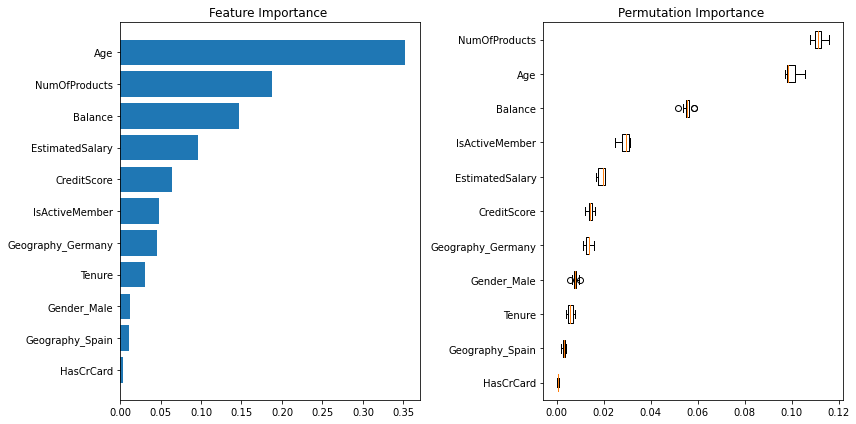

In [64]:
# Построим график для понимания важности факторов и permutation_importance
feature_importance = model_gbc_downsampled.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance ")

result = permutation_importance(
    model_gbc_downsampled, features, target, n_repeats=10, random_state=12345, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(features.columns)[sorted_idx],
)
plt.title("Permutation Importance ")
fig.tight_layout()
plt.show()

Вывод

Лучшая модель - это модель Градиентного бустинга. Градиентный бустинг, обученный на несбалансированных данных с порогом 0.2, градиентный бустинг обученный на уменьшенной выборке с порогом 0.62 дают примерно одинаковые результаты по метрикам 0,64 и 0,79 по f1 и roc_auc соответственно. В модели сильно выделяются 2 основных фактора : возраст и количество продуктов. Так же достаточно существенно влияет баланс на счете и активность клиента. При количестве случайного перемешивания объектов равном 10 важность признаков для данного набора данных существенно не изменяется. Так же остается самый существенный фактор это возраст, далее количество продуктов, активность и баланс на счете.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*